# check Langleys

In [313]:
import atmPy.radiation.retrievals.langley_calibration as atmlc
import atmPy.radiation.retrievals.spectral_irradiance as atmspec
import atmPy.aerosols.physics.column_optical_properties as atmcop
import helpers

In [314]:
reload(atmspec)
reload(atmspec.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [315]:
prefix = '/Users/htelg'

## 649

In [316]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [317]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/')
lt = atmlc.open_langleys(p2fld)
lt_pre_649 = lt

Text(0.5, 1.0, '1625')

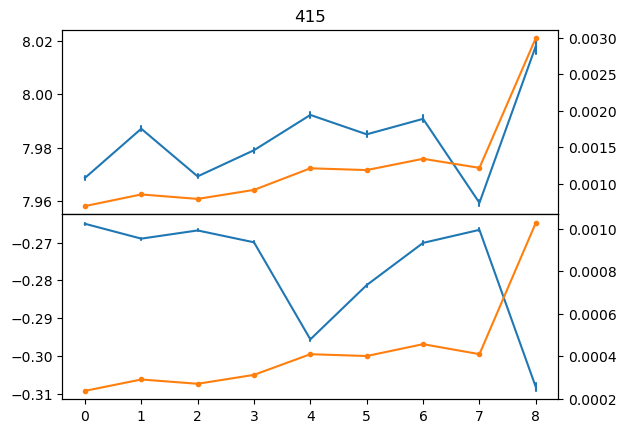

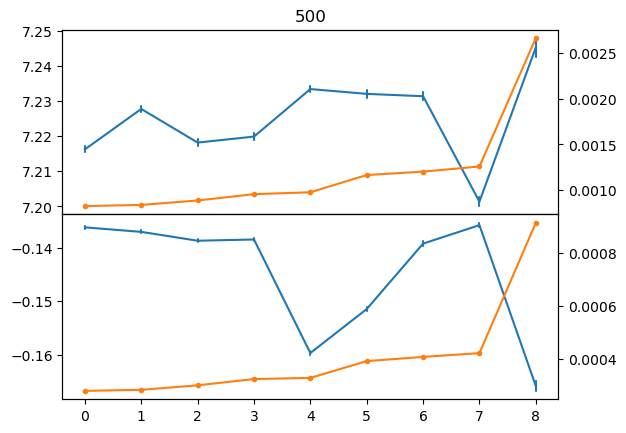

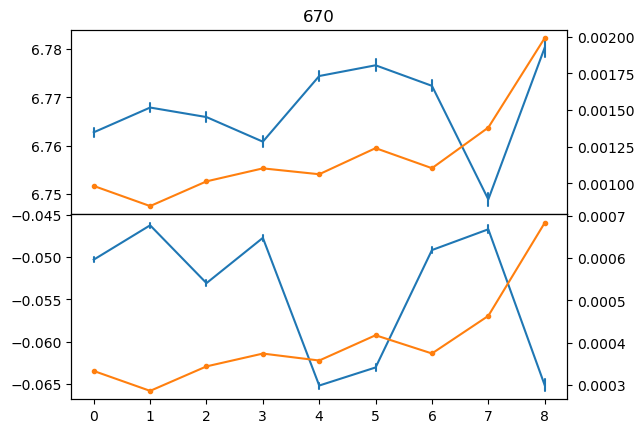

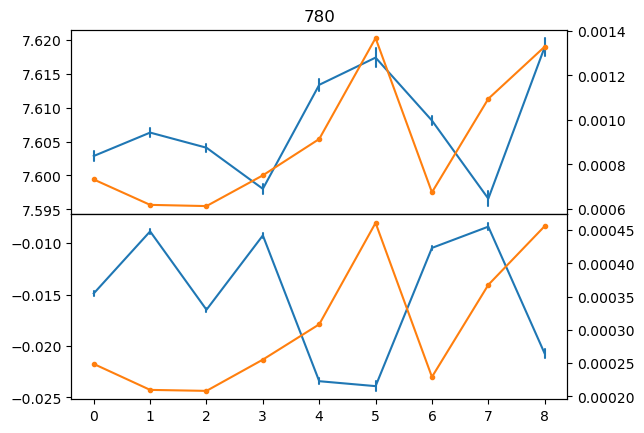

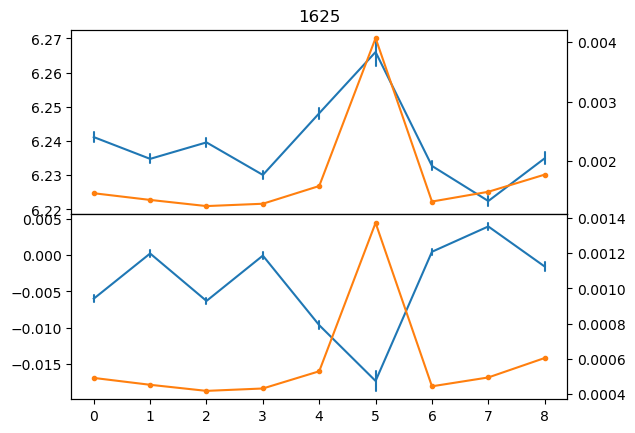

In [318]:
wlsort=500
f,a = lt.plot_sorted(wl = 415, wlsort=wlsort)
a[0].set_title('415')
f,a = lt.plot_sorted(wl = 500, wlsort=wlsort)
a[0].set_title('500')
f,a = lt.plot_sorted(wl = 670, wlsort=wlsort)
a[0].set_title('670')
f,a = lt.plot_sorted(wl = 870, wlsort=wlsort)
a[0].set_title('780')
f,a = lt.plot_sorted(wl = 1625, wlsort=wlsort)
a[0].set_title('1625')

In [319]:
lt.V0_simple

<xarray.Dataset> Size: 240B
Dimensions:         (wavelength: 6)
Coordinates:
  * wavelength      (wavelength) int64 48B 415 500 670 870 940 1625
Data variables:
    V0              (wavelength) float64 48B 2.932e+03 1.374e+03 ... 512.3
    V0_std          (wavelength) float64 48B 47.94 16.39 7.819 15.1 189.6 6.063
    OD_uncertainty  (wavelength) float64 48B 0.01635 0.01193 ... 0.08178 0.01184
    V0_stderr       (wavelength) float64 48B 0.001246 0.001197 ... 0.001721

In [23]:
lt.V0_simple.V0_std/lt.V0_simple.V0

<xarray.DataArray (wavelength: 6)> Size: 48B
array([0.01175375, 0.01013833, 0.00784127, 0.00536854, 0.07968902,
       0.0077045 ])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625

# create Langles

In [332]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspir

In [333]:
version = '0.3'
"""
changes
-------
0.3
- use cloud screening for cleaning
- removed 940 nm channel in langley cleaning!
0.2
- langleys out to 5 atm
"""
p2fld_lang = f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{{serialno}}.langleys/v{{version}}'
p2fld_lang

'/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.langleys/v{version}'

In [334]:
serialno = 649
lt = lt_pre_649
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version_in}/')


In [335]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [336]:
p2flist

[PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250921.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250922.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250923.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250924.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250925.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250926.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250927.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250929.nc'),
 PosixPath('/Users/htelg/nfs

### 20251018

In [412]:
%matplotlib inline

In [413]:
date = '1018'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

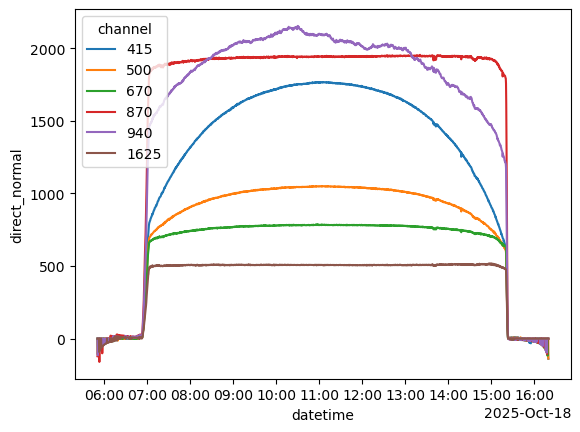

In [414]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [417]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


In [418]:
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2.5, 
                  # use_channels=[500,]
                 )['langley']
if 0:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=3, 
                  # use_channels=[500,]
                 )['langley']

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

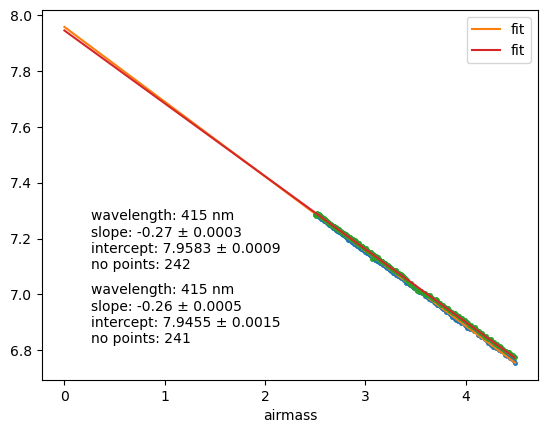

In [419]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

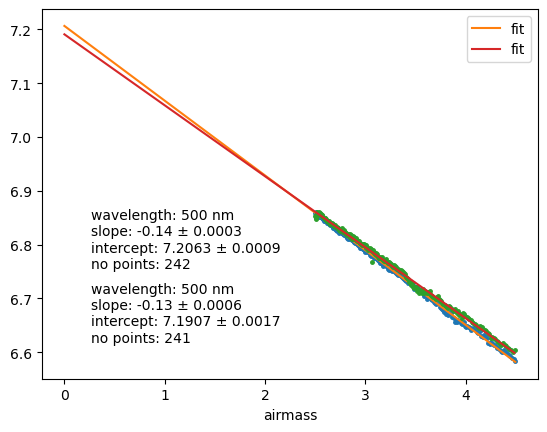

In [420]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

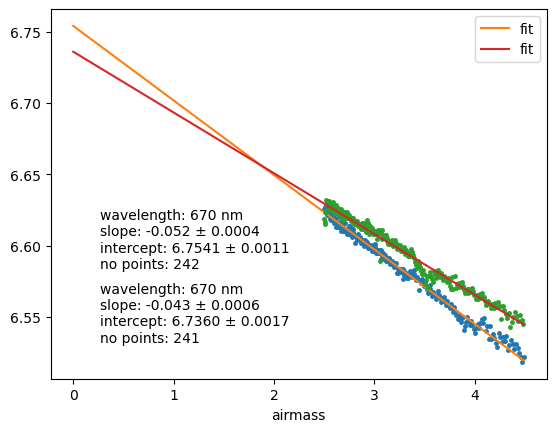

In [421]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

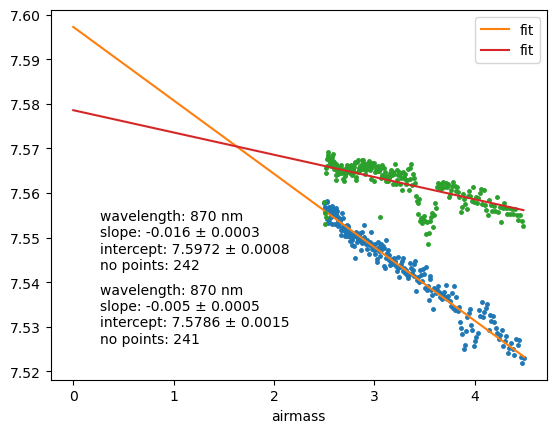

In [422]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

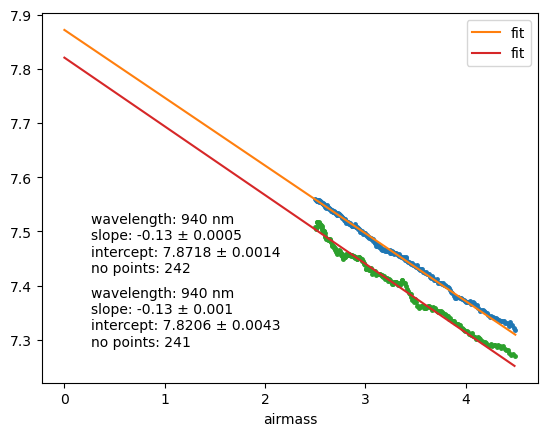

In [423]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

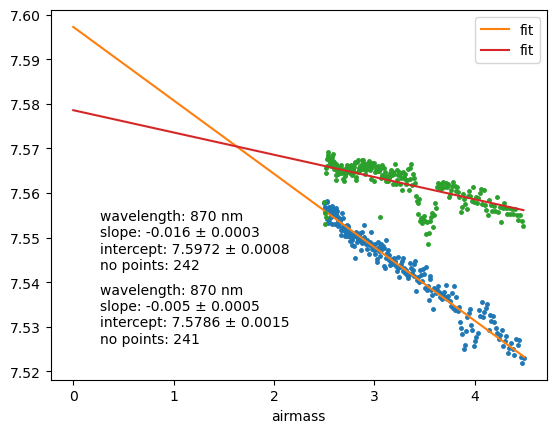

In [424]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

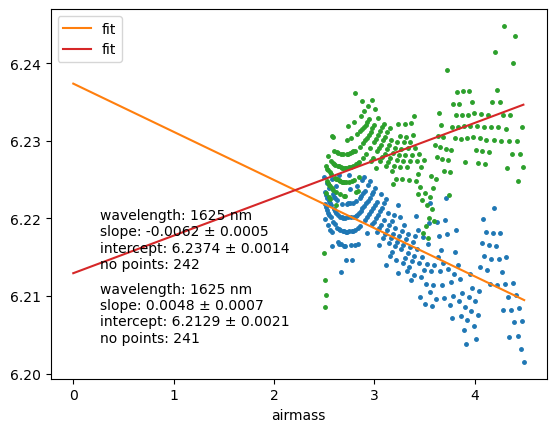

In [425]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [426]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251018.nc')

In [427]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251018.nc')

### 20251017

In [337]:
%matplotlib inline

In [395]:
date = '1017'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

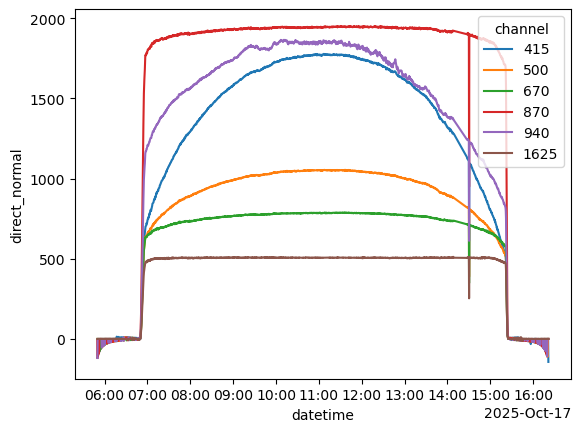

In [396]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [397]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


In [400]:
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2.5, 
                  # use_channels=[500,]
                 )['langley']
if 1:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=3, 
                  # use_channels=[500,]
                 )['langley']

skewness: -0.0591	 skewscale:3.5316
skewness: 0.0541	 skewscale:3.4865


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

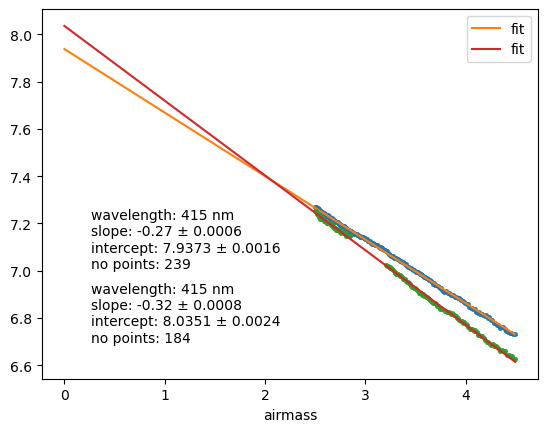

In [401]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

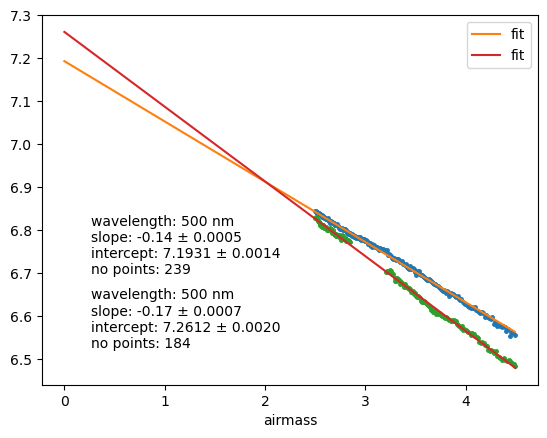

In [402]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

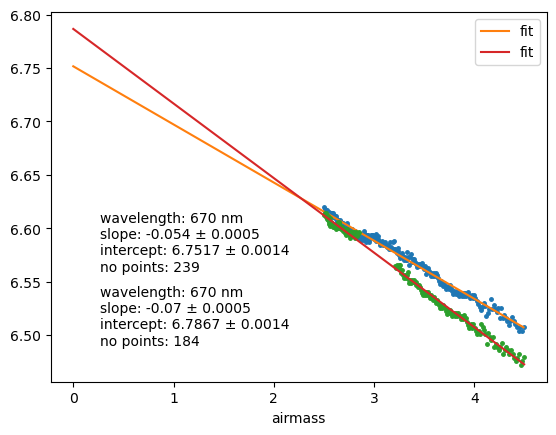

In [403]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

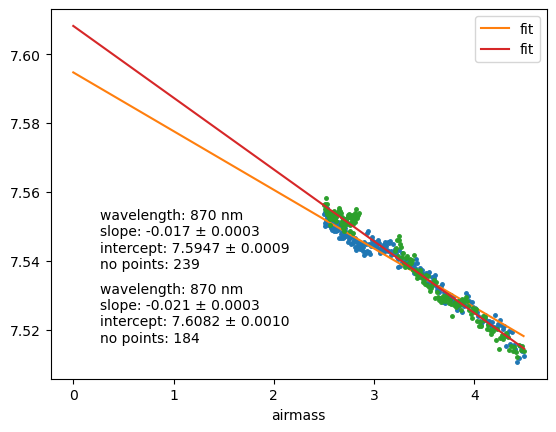

In [404]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

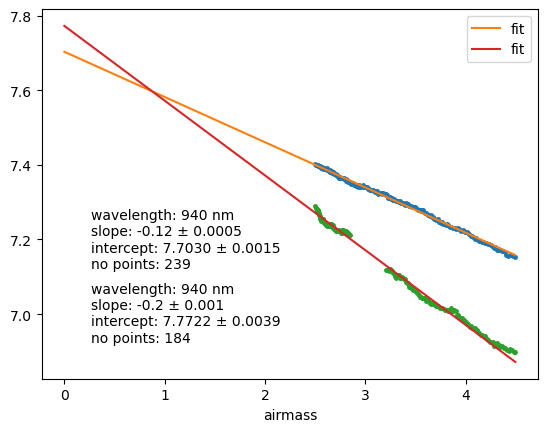

In [405]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

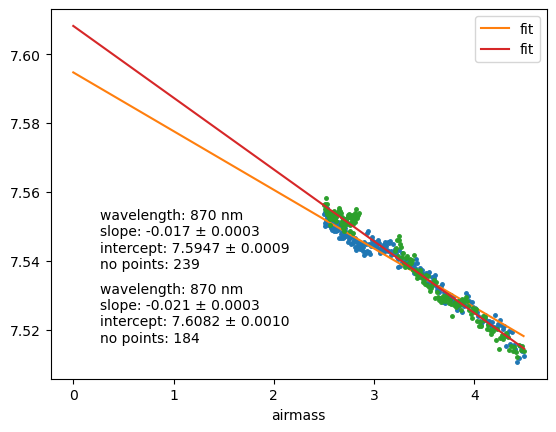

In [406]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

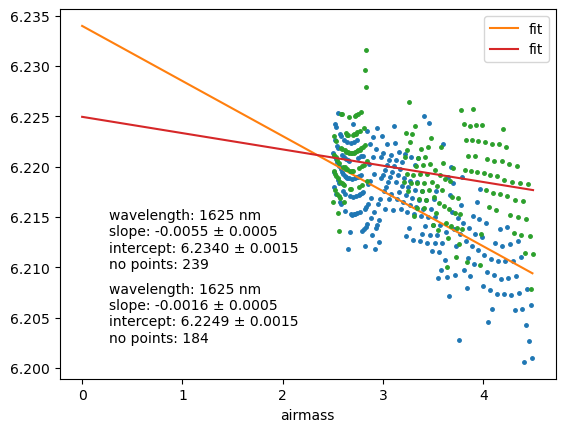

In [407]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [408]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251017.nc')

In [409]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20251016

In [337]:
%matplotlib inline

In [370]:
date = '1016'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

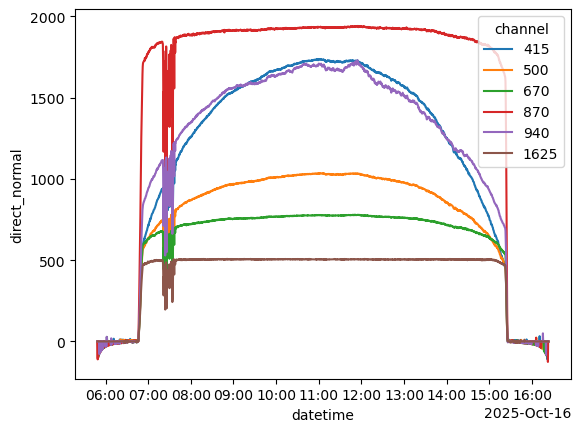

In [371]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [380]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


In [385]:
if 1:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2.5, 
                  # use_channels=[500,]
                 )['langley']
if 0:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

skewness: -0.1692	 skewscale:3.5573
skewness: -0.1860	 skewscale:3.6624
skewness: -0.2002	 skewscale:3.7513
skewness: -0.1965	 skewscale:3.7280
skewness: -0.2125	 skewscale:3.8281
skewness: -0.2444	 skewscale:4.0276
skewness: -0.2282	 skewscale:3.9264
skewness: -0.1968	 skewscale:3.7303
skewness: -0.1768	 skewscale:3.6048
skewness: -0.1596	 skewscale:3.4978
skewness: -0.1149	 skewscale:3.2183
skewness: -0.0822	 skewscale:3.0138
skewness: -0.0417	 skewscale:2.7605
skewness: 0.0053	 skewscale:2.5328
skewness: 0.0470	 skewscale:2.7939
skewness: 0.0833	 skewscale:3.0209
skewness: 0.0990	 skewscale:3.1188


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

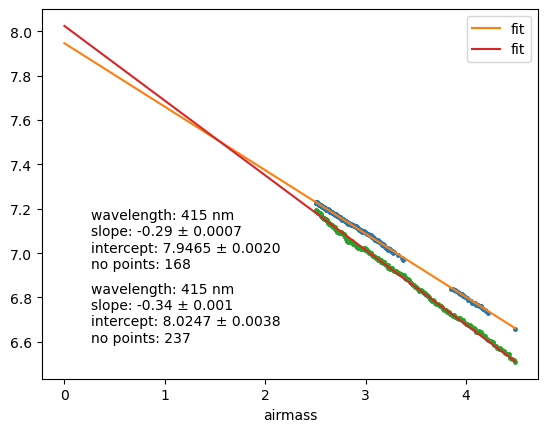

In [386]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

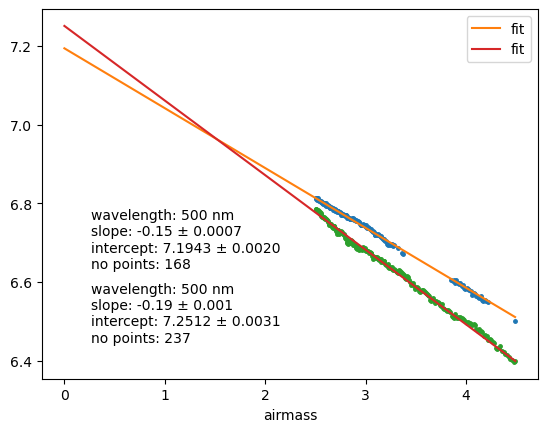

In [387]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

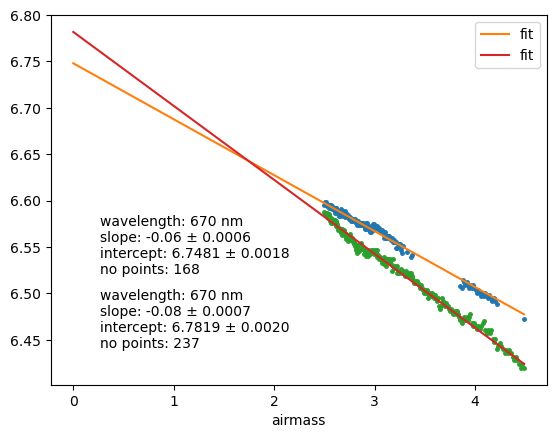

In [388]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

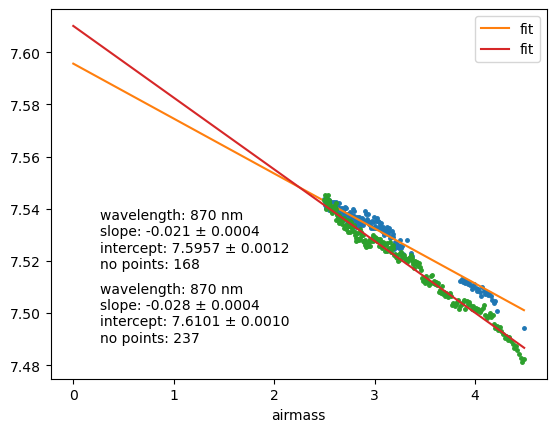

In [389]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

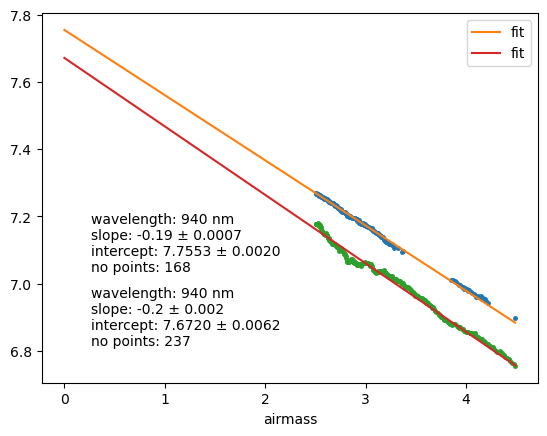

In [390]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

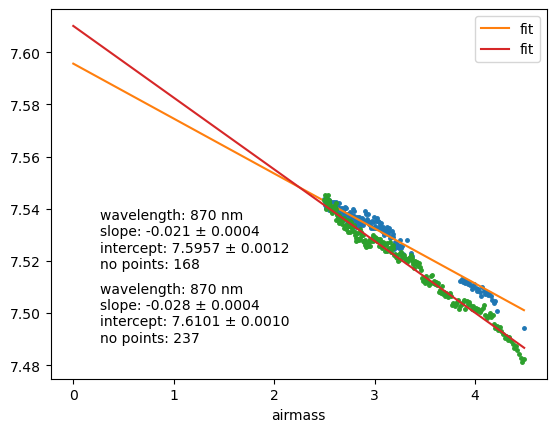

In [391]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

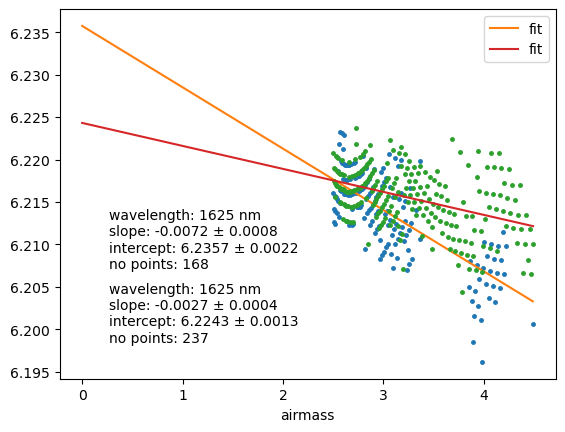

In [392]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [393]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True, parents=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

In [394]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251016.nc')

### 20251015

In [337]:
%matplotlib inline

In [352]:
date = '1015'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

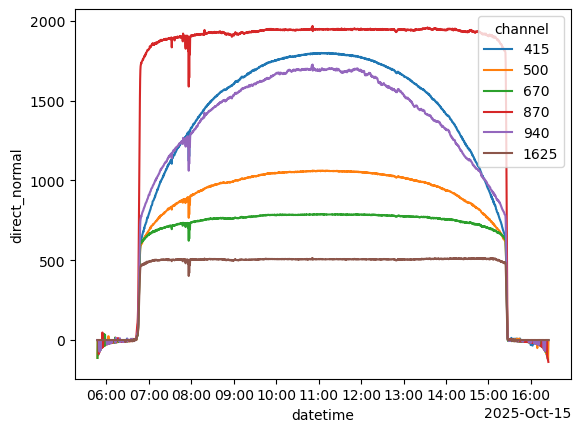

In [353]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [ ]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out

In [360]:
if 1:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']
if 0:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

skewness: -0.1589	 skewscale:2.6357
skewness: -0.1555	 skewscale:2.6220
skewness: -0.0429	 skewscale:2.1717
skewness: 0.0649	 skewscale:2.2597
skewness: 0.0675	 skewscale:2.2700
skewness: 0.0657	 skewscale:2.2629


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

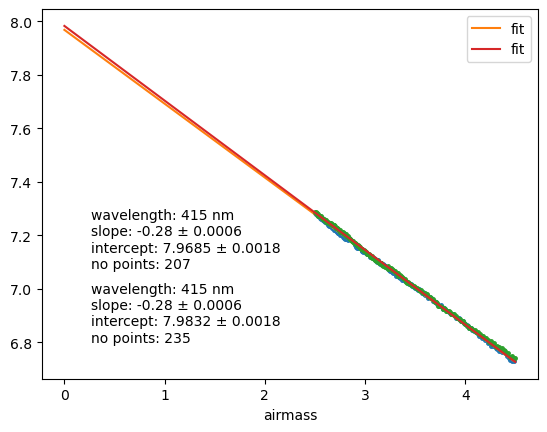

In [361]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

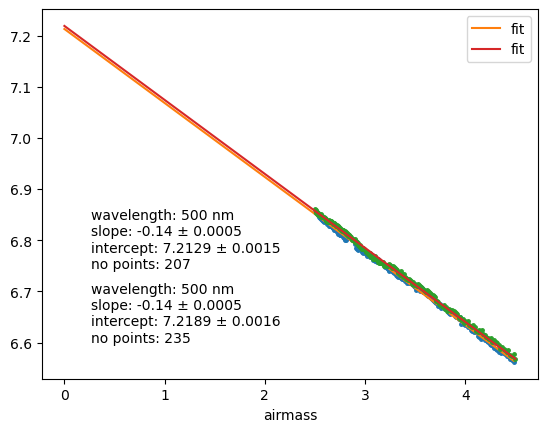

In [362]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

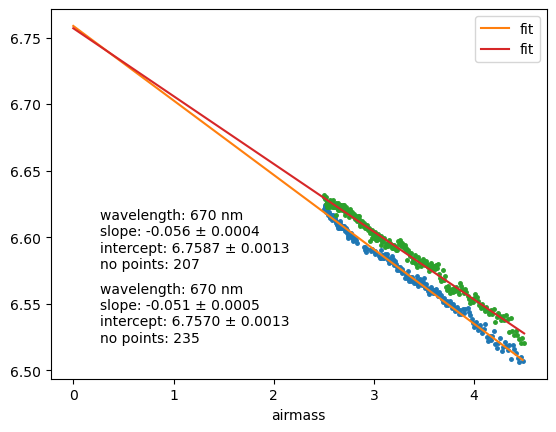

In [363]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

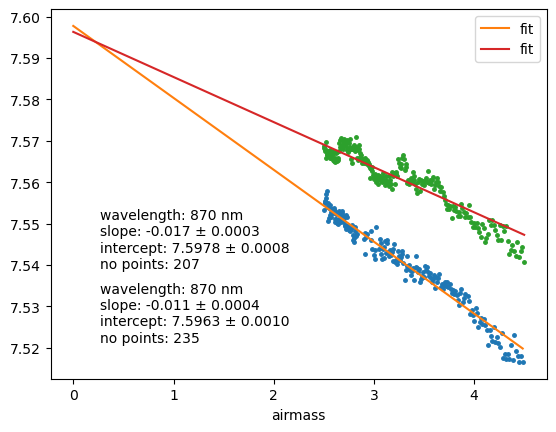

In [364]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

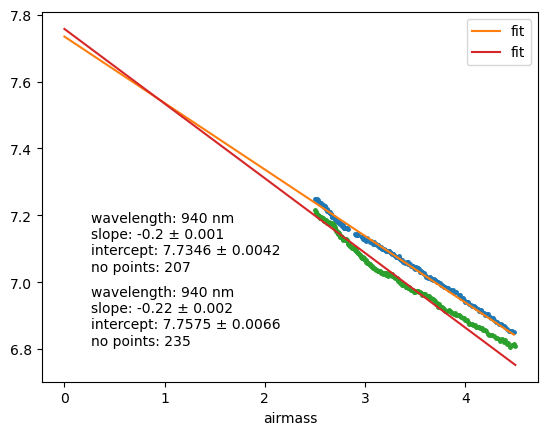

In [365]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

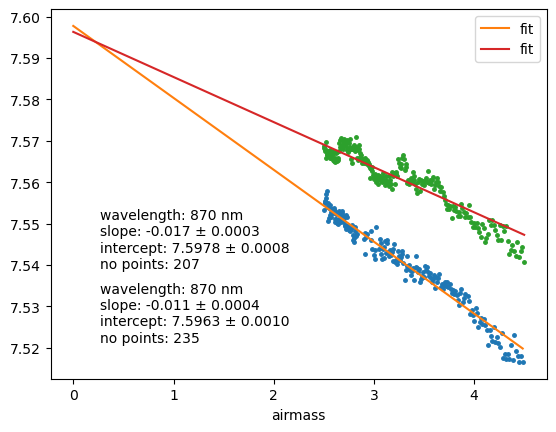

In [366]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

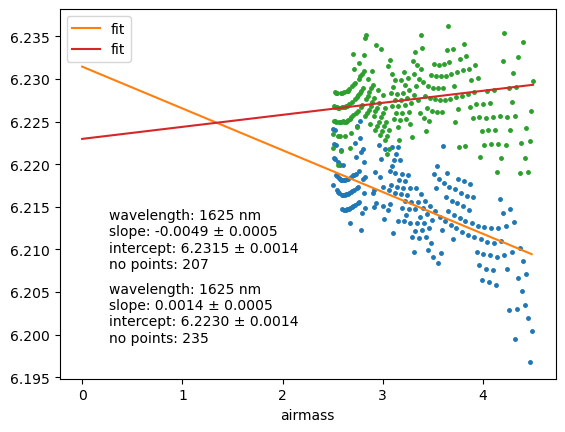

In [367]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [368]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251015.nc')

In [369]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251015.nc')

### 20251014

In [337]:
%matplotlib inline

In [338]:
date = '1014'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

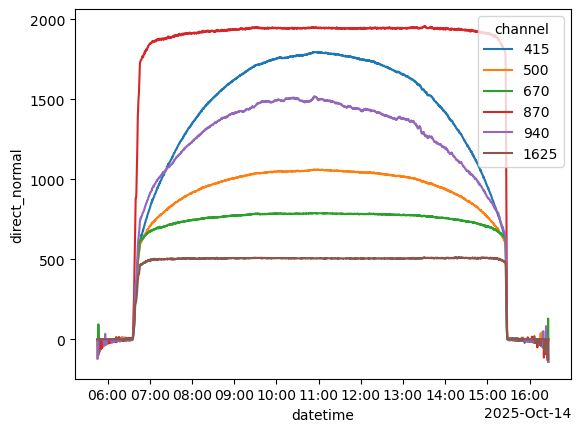

In [339]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [342]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']
if 0:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

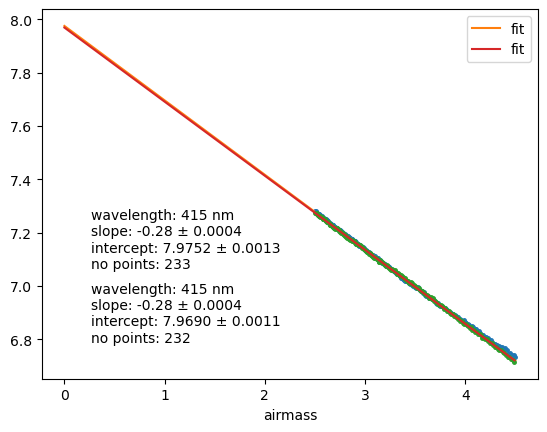

In [343]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

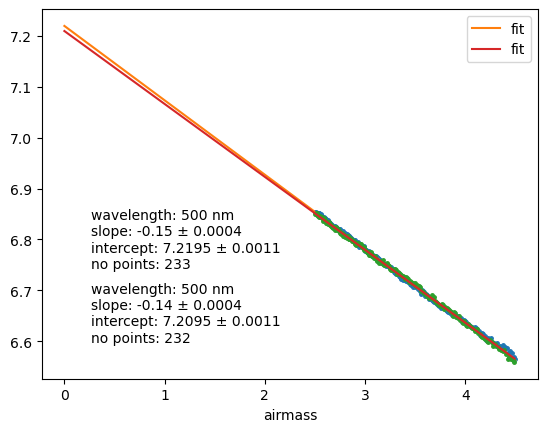

In [344]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

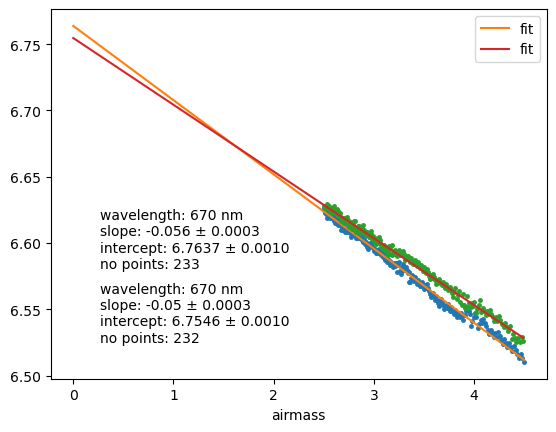

In [345]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

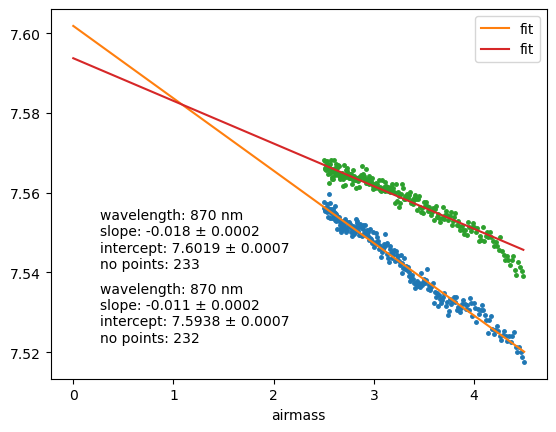

In [346]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

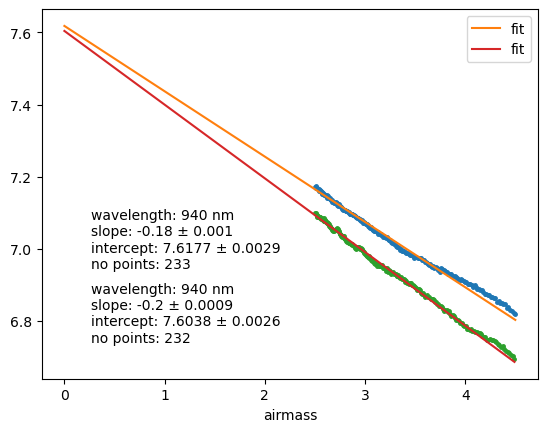

In [347]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

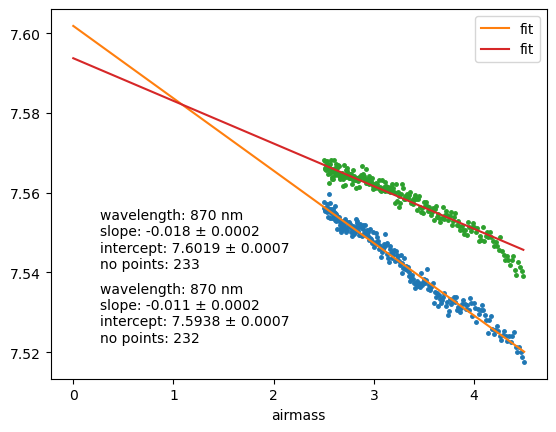

In [348]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

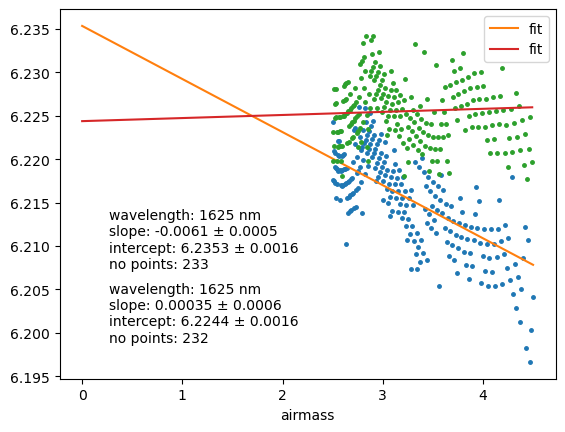

In [349]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [350]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251014.nc')

In [351]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251014.nc')

### 20251013

In [208]:
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [209]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251013.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251013_preliminary.nc'

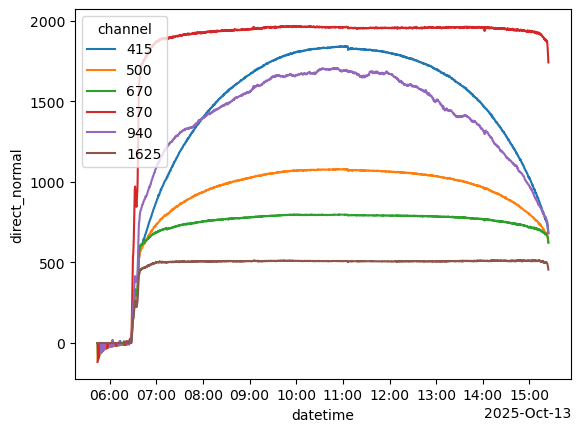

In [210]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [211]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [212]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

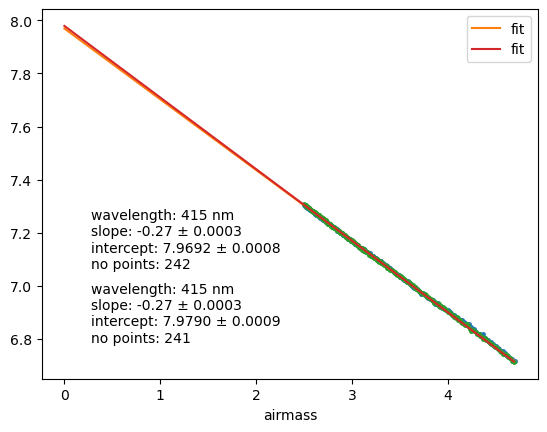

In [213]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

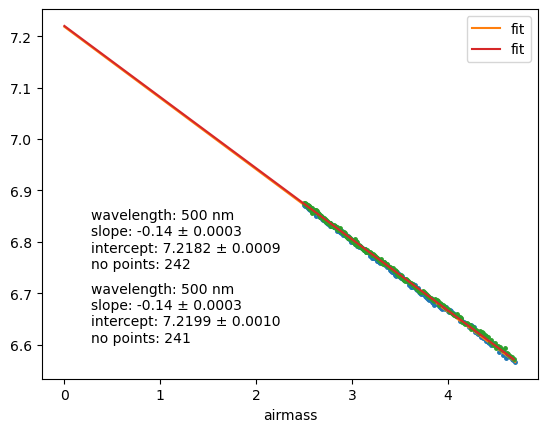

In [214]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

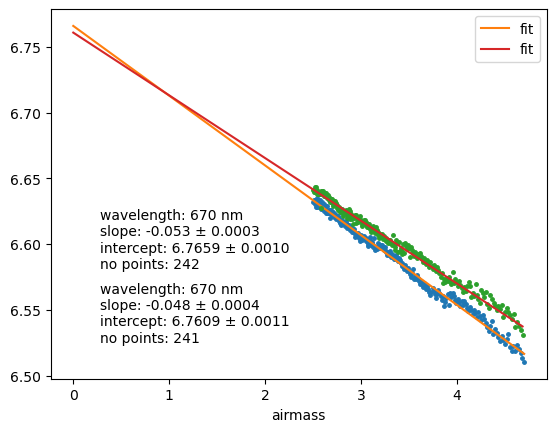

In [215]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

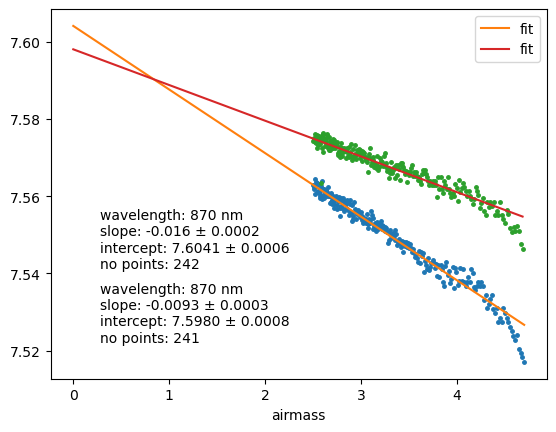

In [216]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

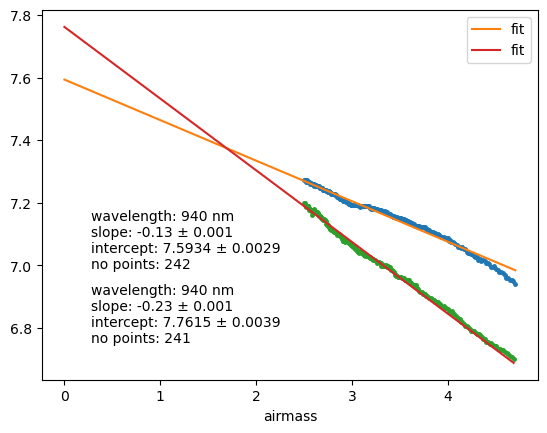

In [217]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

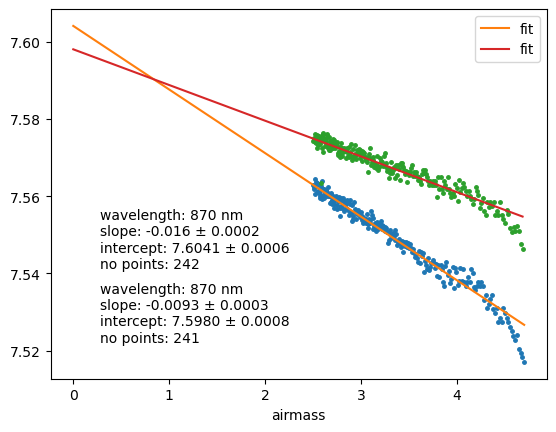

In [218]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

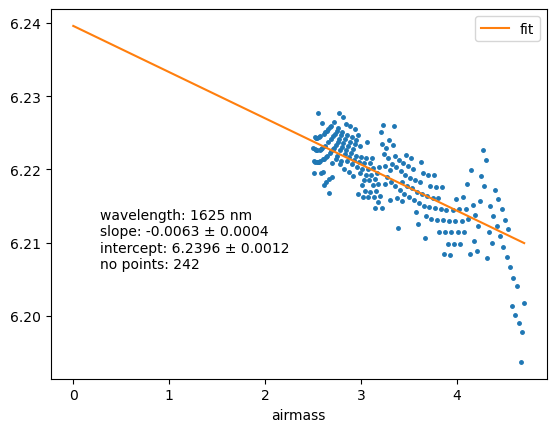

In [219]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [220]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251013.nc')

In [223]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251013.nc')

### 20251012

In [208]:
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [224]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251012.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251012_preliminary.nc'

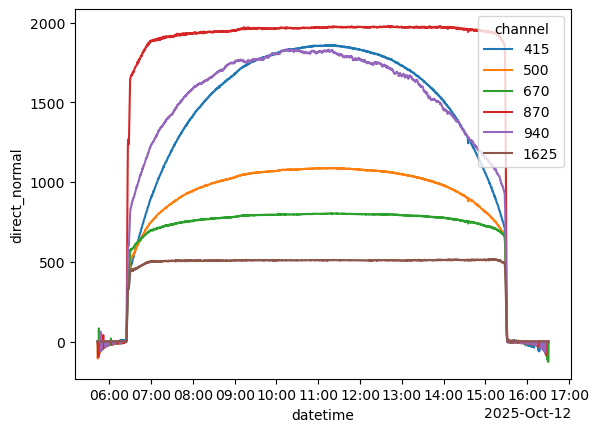

In [225]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [226]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [227]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

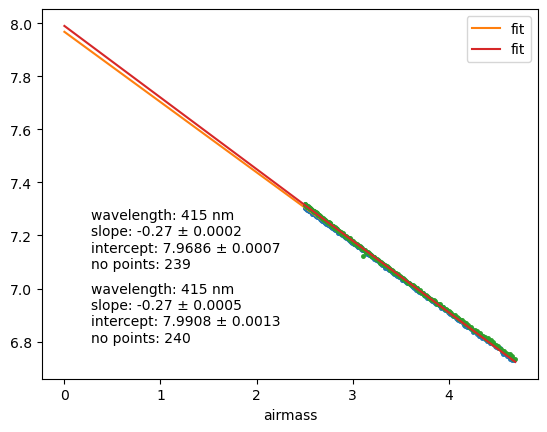

In [228]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

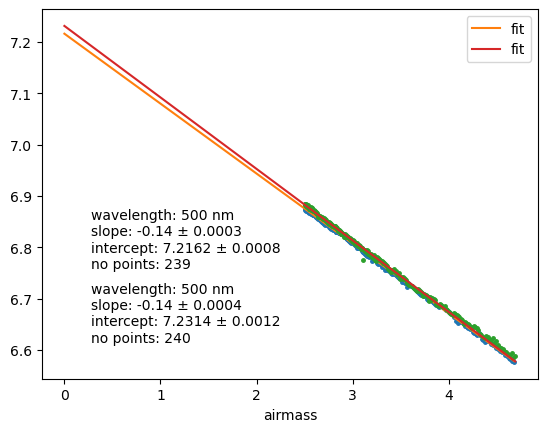

In [229]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

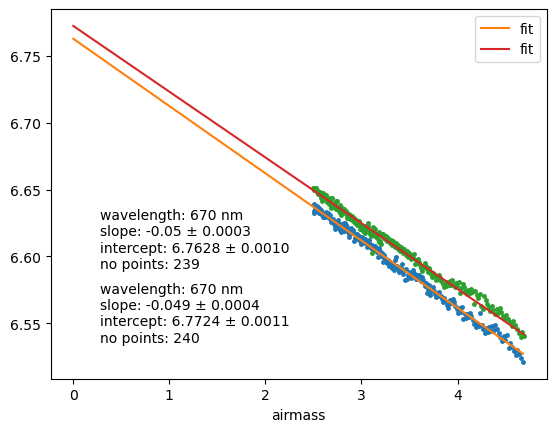

In [230]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

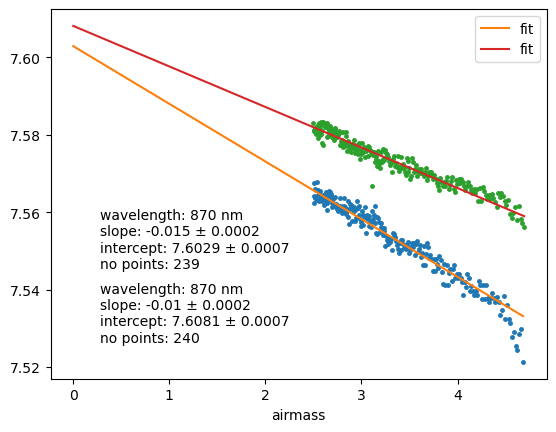

In [231]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

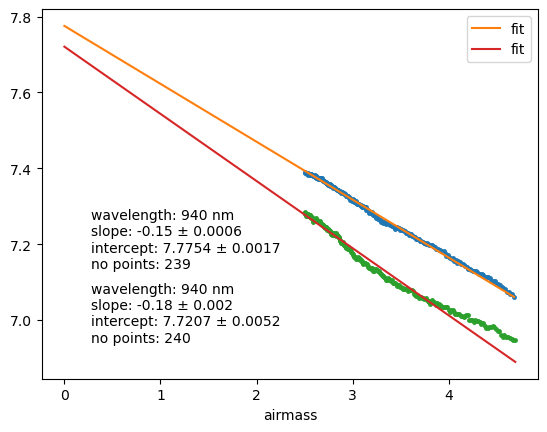

In [232]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

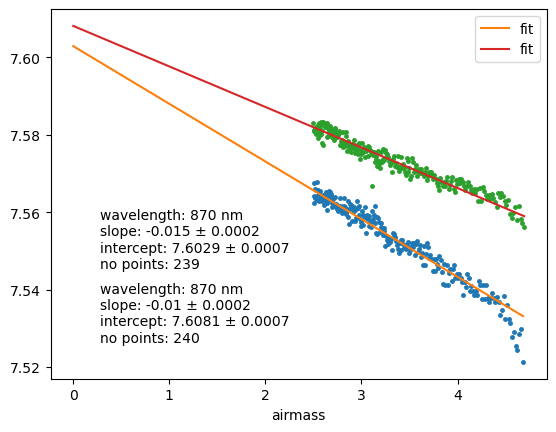

In [233]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

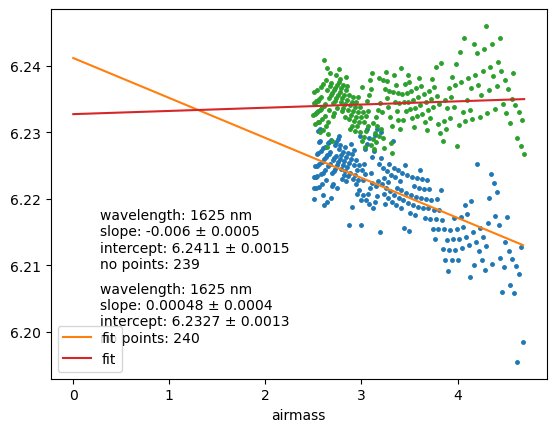

In [235]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [236]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251012.nc')

In [238]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251012.nc')

### 20251011

In [208]:
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [239]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251011.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251011_preliminary.nc'

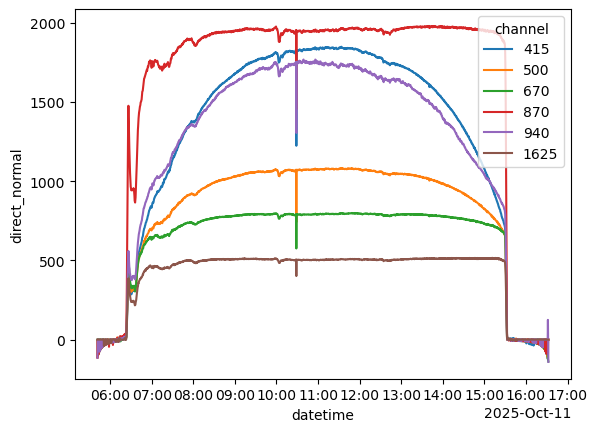

In [240]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [241]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [242]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

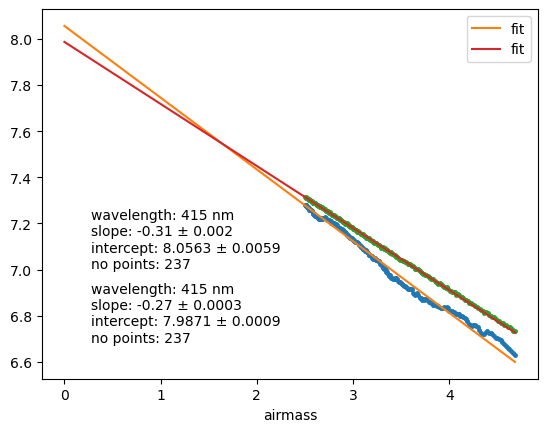

In [243]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

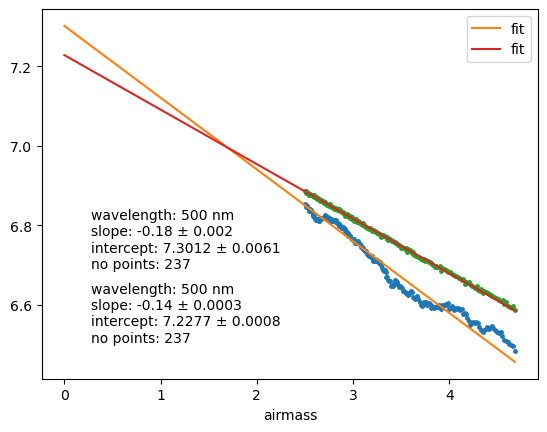

In [244]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

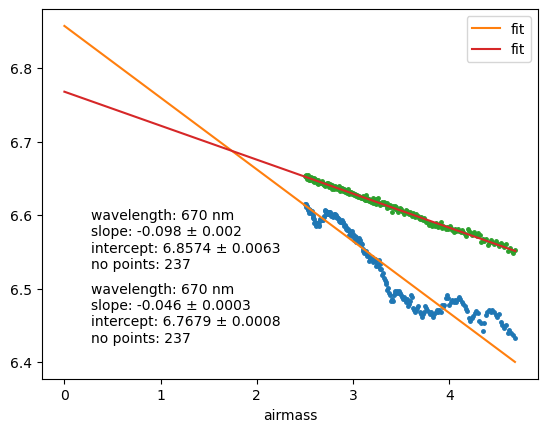

In [245]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

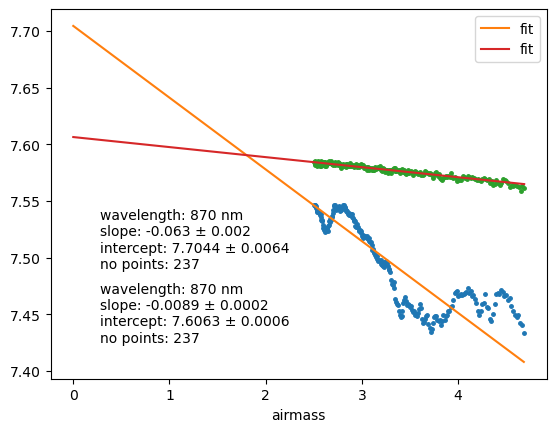

In [246]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

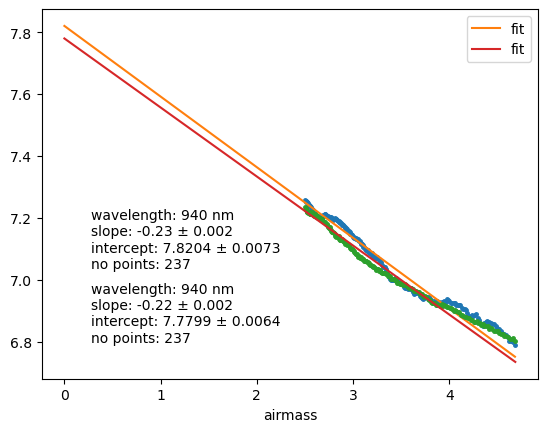

In [247]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

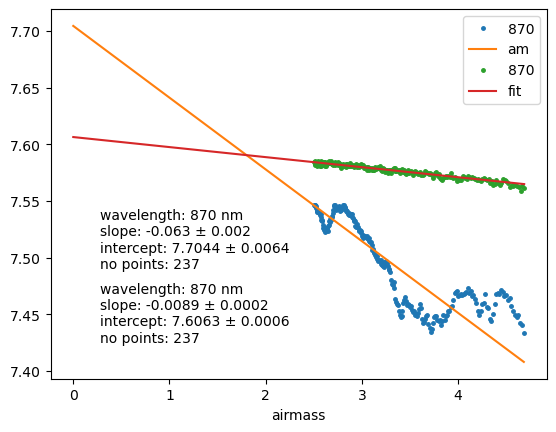

In [254]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
g = a.get_lines()[-1]
g.set_label('am')
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)
a.legend()

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

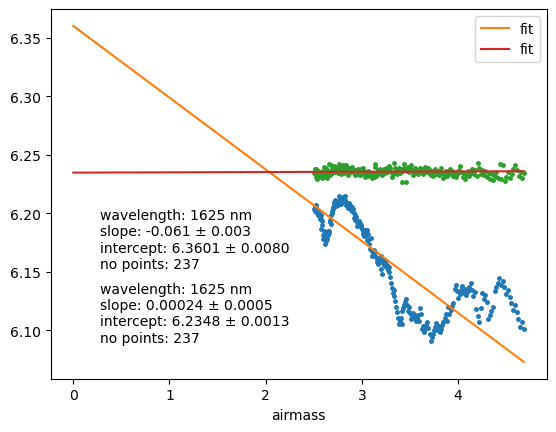

In [255]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [220]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251013.nc')

In [256]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251011.nc')

### 20251002

In [143]:
%matplotlib inline

In [165]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251002.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251002_preliminary.nc'

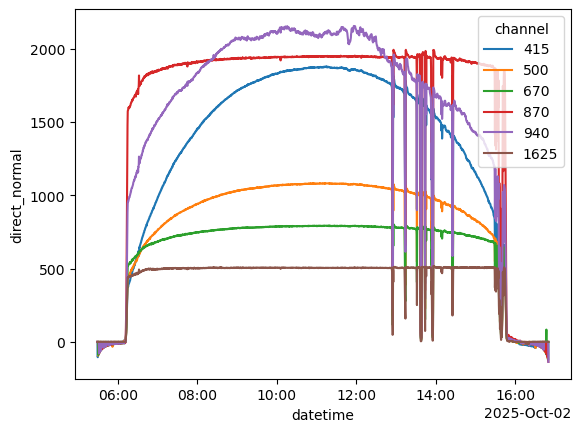

In [166]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [167]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [168]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

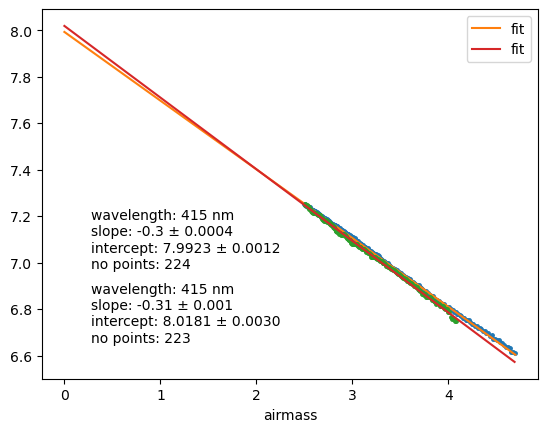

In [169]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

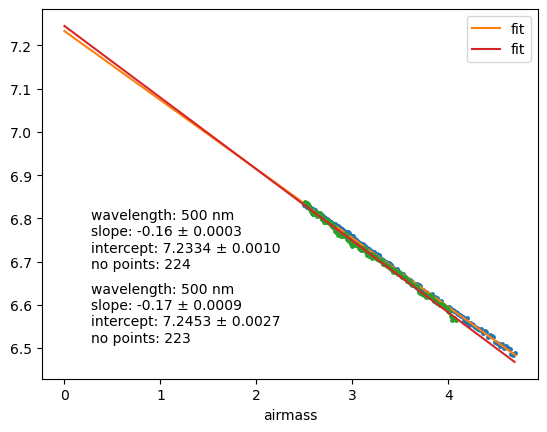

In [170]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

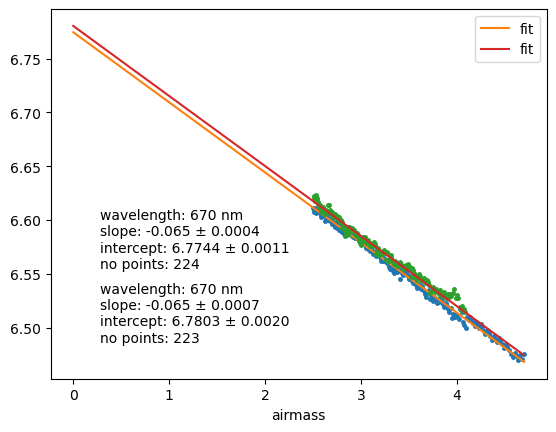

In [171]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

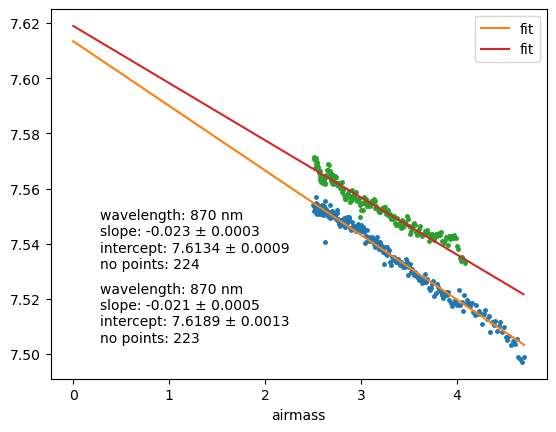

In [172]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

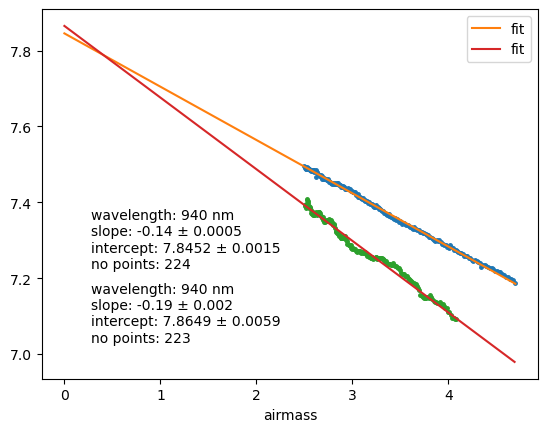

In [173]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

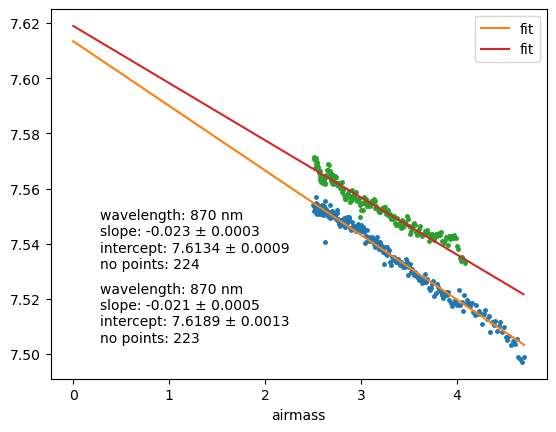

In [174]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

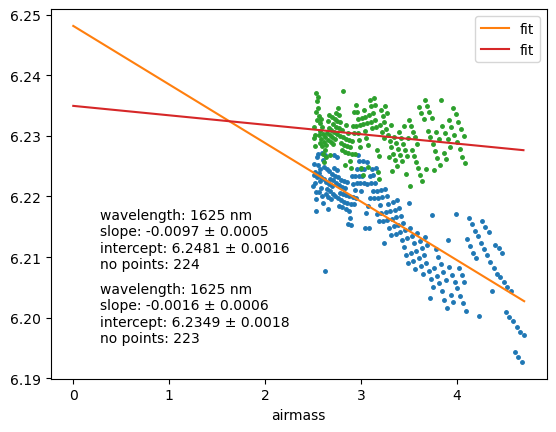

In [175]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [178]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

File exist!!!


PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251002.nc')

In [179]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251002.nc')

### 20250929

* met data is short!!

In [180]:
%matplotlib inline

In [183]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250929.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250929_preliminary.nc'

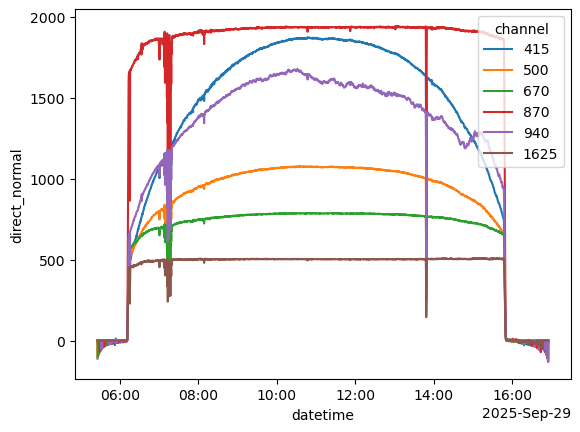

In [184]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [185]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [186]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

In [187]:
lang_pm.langleys.dropna()

Empty DataFrame
Columns: [415, 500, 670, 870, 940, 1625]
Index: []

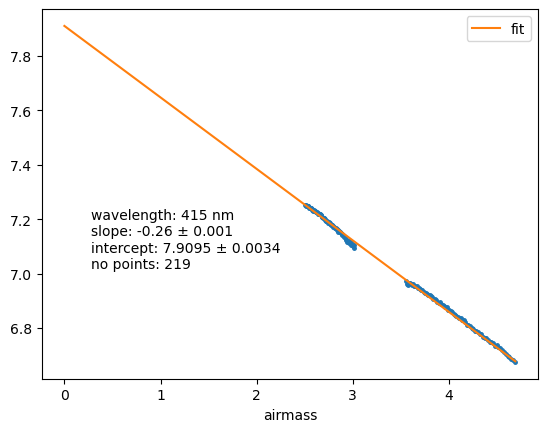

In [188]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

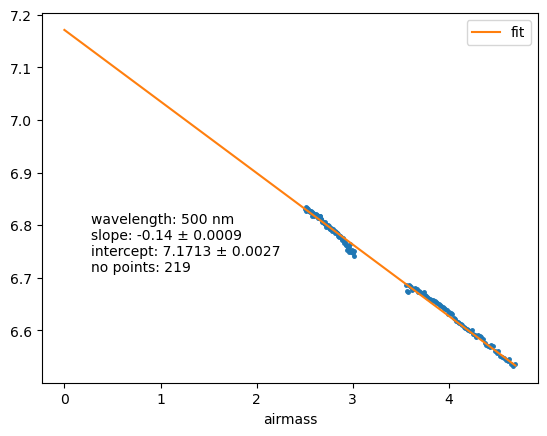

In [189]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

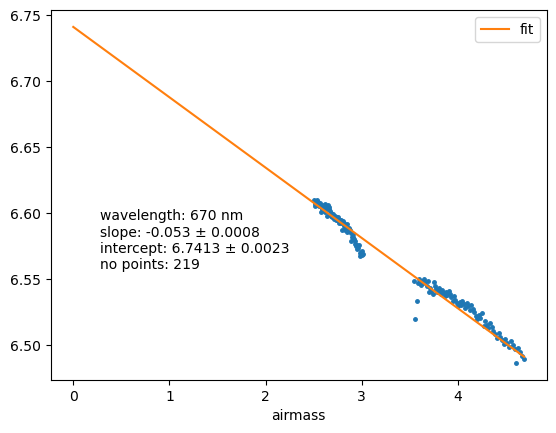

In [190]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

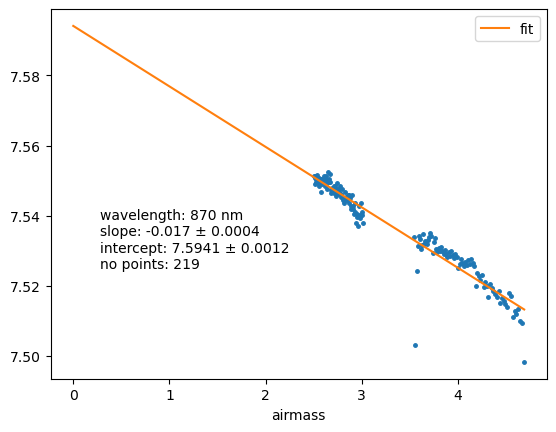

In [191]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

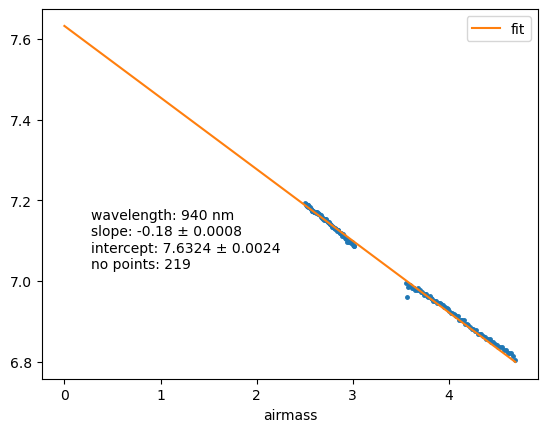

In [192]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

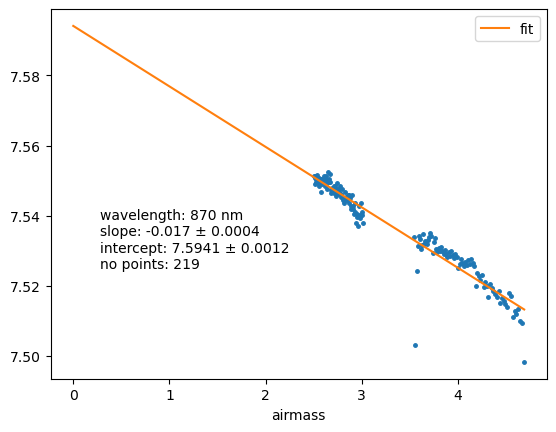

In [193]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

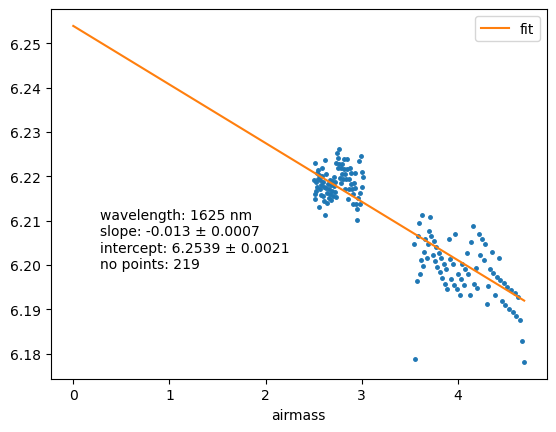

In [194]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [167]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

File exist!!!


PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20250929.nc')

In [134]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20250928

In [195]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'

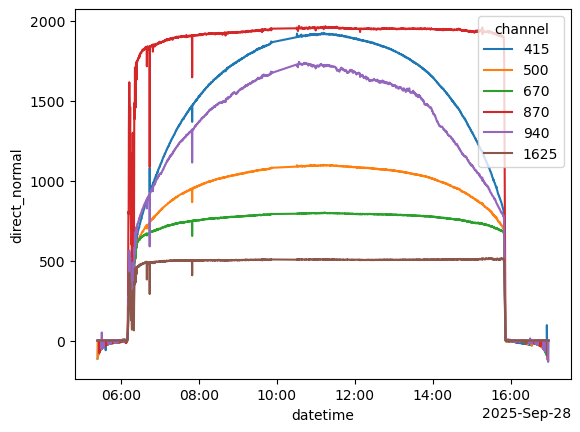

In [196]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [197]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [198]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/Users/htelg/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/Users/htelg/pr

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

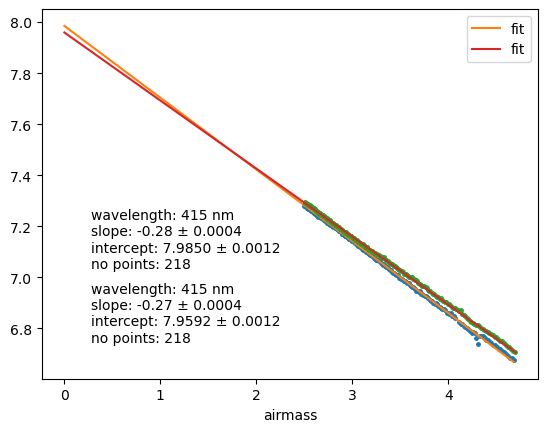

In [199]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

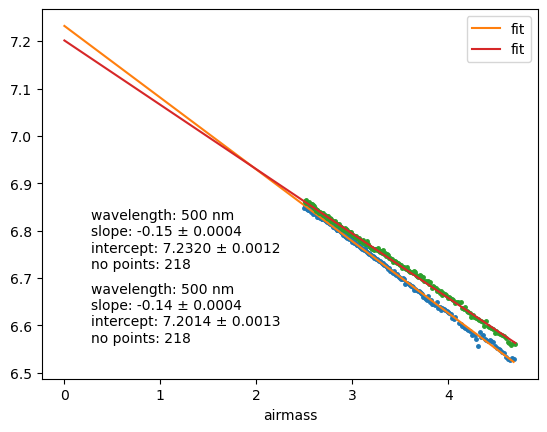

In [200]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

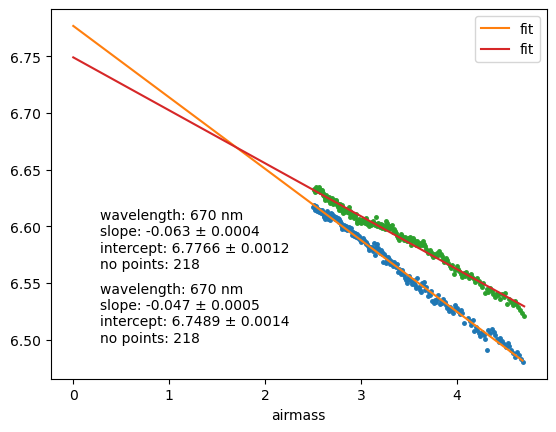

In [201]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

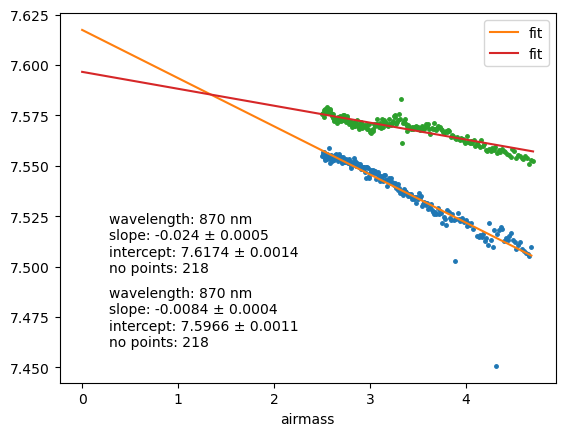

In [202]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

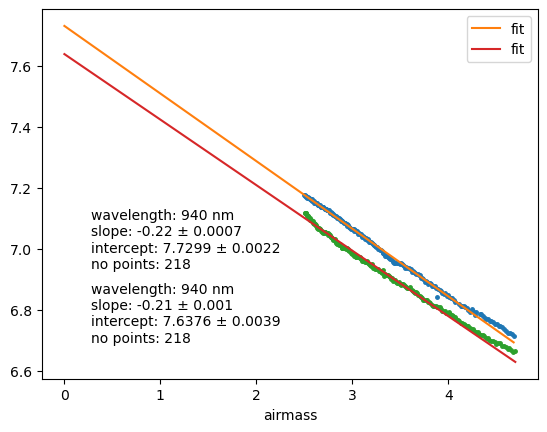

In [203]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

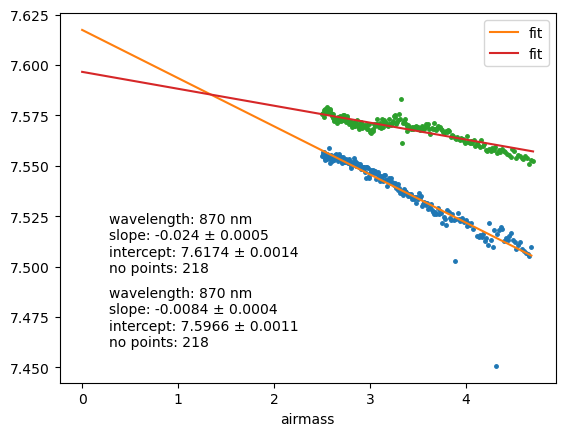

In [204]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

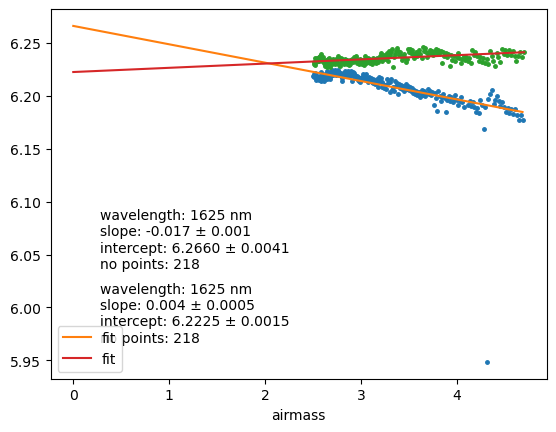

In [205]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [206]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20250928.nc')

In [207]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20250928.nc')

# Condition langleys

In [1]:
import atmPy.radiation.retrievals.langley_calibration as atmlc


In [2]:
prefix = '/Users/htelg'

In [43]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [44]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/')
lt = atmlc.open_langleys(p2fld)

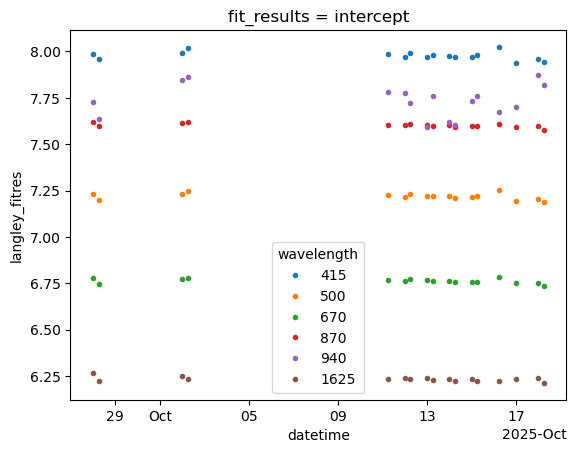

In [45]:
out = lt.dataset.langley_fitres.sel(fit_results = 'intercept').plot.line(x = 'datetime', ls = '', marker = '.')

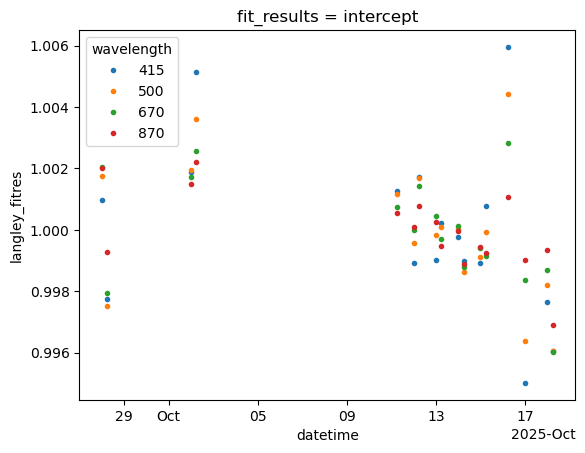

In [46]:
# any sudden steps?
bla = lt.dataset.langley_fitres.sel(fit_results = 'intercept', wavelength = [415, 500, 670, 870])
bla /= bla.mean('datetime')
out = bla.plot.line(x = 'datetime', ls = '', marker = '.')

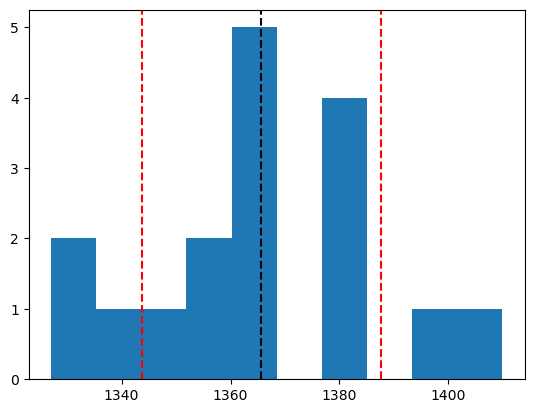

In [47]:
f,a = plt.subplots()
v0s = lt.dataset.langley_fitres.sel(wavelength = 500, fit_results = 'intercept')
v0s = np.exp(v0s)
a.hist(v0s, bins = 10)
a.axvline(v0s.mean(), ls = '--', color = 'black')
a.axvline(v0s.mean() + v0s.std(), ls = '--', color = 'red')
a.axvline(v0s.mean() - v0s.std(), ls = '--', color = 'red')

# remove outliers

In [48]:
import copy

# at individual stderr

In [49]:
lttrunc = copy.deepcopy(lt)
ds = lttrunc.dataset
# remove largest stderr
stderr = ds.langley_fitres.sel(fit_results = 'intercept_stderr')
lttrunc.dataset['langley_fitres'] = ds.langley_fitres.where(stderr < stderr.quantile(0.9, dim = 'datetime'))

# remove outliers based on quantiles
ds = lttrunc.dataset
interc = ds.langley_fitres.sel(fit_results = 'intercept')
where = np.logical_and(interc.quantile(0.1, dim = 'datetime') < interc, interc < interc.quantile(0.9, dim = 'datetime'))
lttrunc.dataset['langley_fitres'] = ds.langley_fitres.where(where)

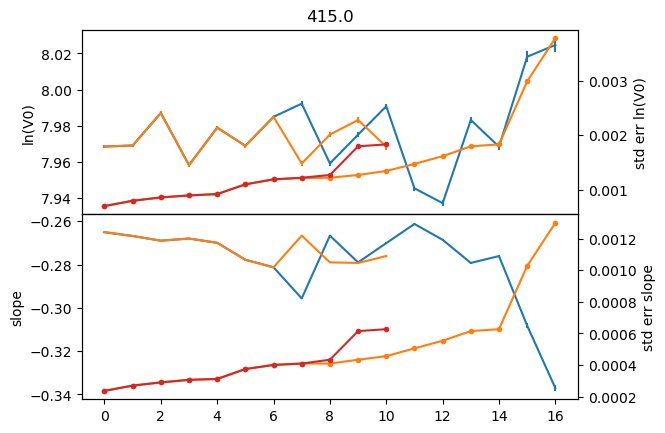

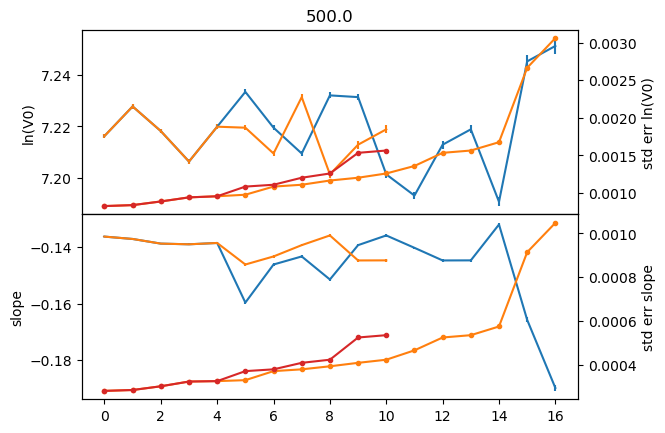

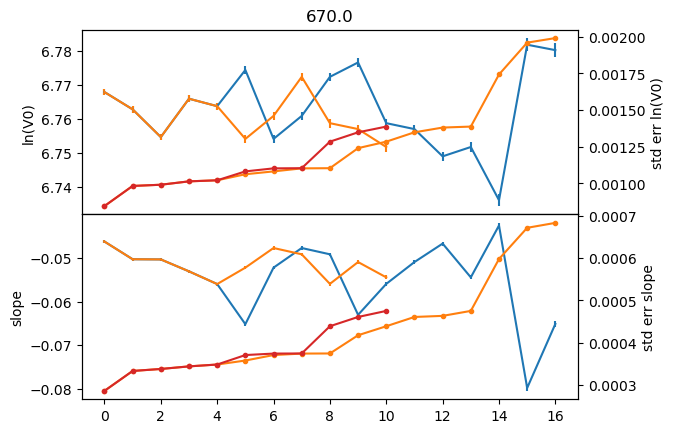

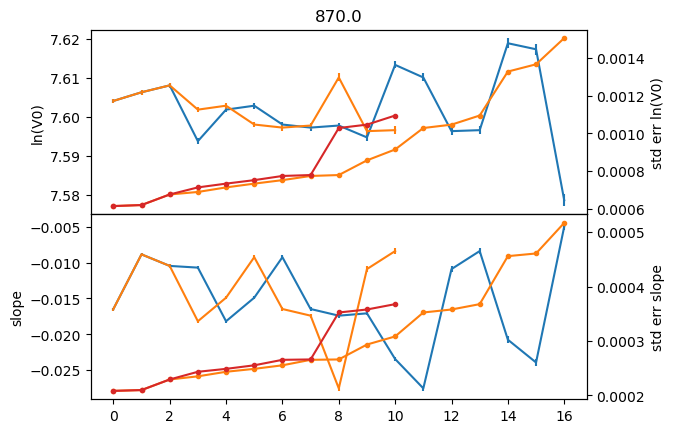

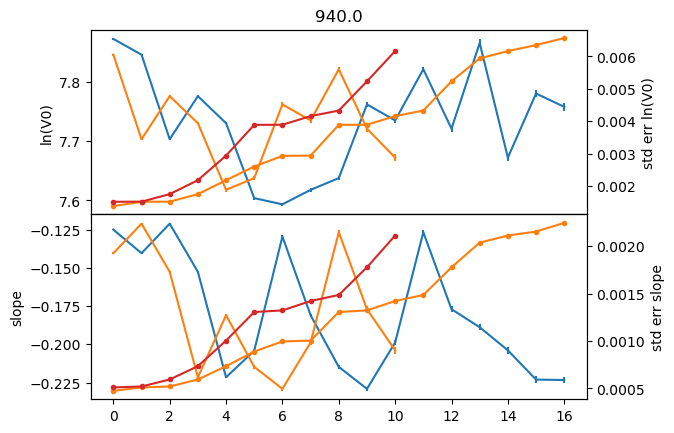

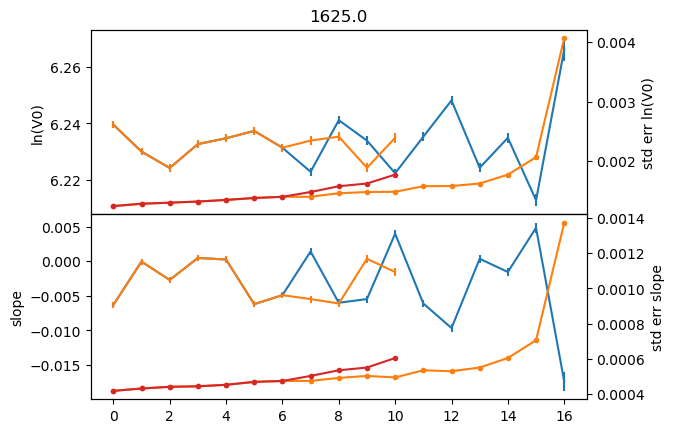

In [50]:
# all sorted by the stderr of the individual channel
wls = lt.dataset.wavelength
for wl in wls:
    f,aa = lt.plot_sorted(wl = wl, wlsort=wl)
    f,aa = lttrunc.plot_sorted(wl = wl, wlsort=wl, aa = aa)
    # aa
    aa[0].set_title(float(wl))

In [51]:
lt.V0_simple.OD_uncertainty

<xarray.DataArray 'OD_uncertainty' (wavelength: 6)> Size: 48B
array([0.03703973, 0.02856074, 0.0221845 , 0.01901146, 0.13012621,
       0.02182391])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
Attributes:
    description:  (V0_std / V0 * osub) + 0.005. osub: one-sided upper bound f...

In [52]:
lttrunc.V0_simple.V0_std/lttrunc.V0_simple.V0

<xarray.DataArray (wavelength: 6)> Size: 48B
array([0.00981369, 0.00877944, 0.00640503, 0.00494715, 0.07072869,
       0.00484378])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
    quantile    float64 8B 0.9
Attributes:
    description:  nbiased standard deviation, ddof = 1

In [53]:
lttrunc.V0_simple.OD_uncertainty

<xarray.DataArray 'OD_uncertainty' (wavelength: 6)> Size: 48B
array([0.02063391, 0.01898629, 0.01520367, 0.01288117, 0.1176759 ,
       0.01271648])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
    quantile    float64 8B 0.9
Attributes:
    description:  (V0_std / V0 * osub) + 0.005. osub: one-sided upper bound f...

In [54]:
lttrunc.V0_simple

<xarray.Dataset> Size: 344B
Dimensions:                              (wavelength: 6)
Coordinates:
  * wavelength                           (wavelength) int64 48B 415 500 ... 1625
    quantile                             float64 8B 0.9
Data variables:
    V0                                   (wavelength) float64 48B 2.901e+03 ....
    V0_std                               (wavelength) float64 48B 28.47 ... 2...
    no_langleys                          (wavelength) int64 48B 11 11 ... 11 11
    one_sided_upper_bound_factor_95conf  (wavelength) float64 48B 1.593 ... 1...
    OD_uncertainty                       (wavelength) float64 48B 0.02063 ......
    V0_stderr                            (wavelength) float64 48B 0.001141 .....
Attributes:
    number_of_langleys_used:  11

In [56]:
p2f = pl.Path().resolve() / 'data/V0_simple_649.nc'
# p2f.unlink()
if p2f.exists():
    print(f'File already exists: {p2f}')
else:
    lttrunc.V0_simple.to_netcdf(p2f)
    print(f'Saved to {p2f}')

Saved to /Users/htelg/projects/cmpaign_2025_PMOD/data/V0_simple_649.nc
